### Project Objectives and questions to answer

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
7. 3 o'clock pulse 
8. percent change graphic 

 
- This project intends to extract and load 1 year of data on three etf's... 
   - Nasdaq (QQQ)
   - SPider (SPY) 
   - Dow Industrial (DIA)
   
The goal is to find and use "important" technical features to and ultiately, predict the prices of the three stock above. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
import math


In [2]:
#!pip install  pandas_datareader 
#from pandas_datareader._utils import RemoteDataError


In [3]:
import pandas_datareader as dr
from pandas_datareader._utils import RemoteDataError
from pandas_datareader import data
from datetime import datetime

## Defining variables for future use in some helpful functions. (I may want to use this  code later to create a dashboard for any ticker)

In [4]:
Start = '2019 -01-01'
End = str(datetime.now().strftime('%Y-%m-%d'))

In [5]:
Invesco = 'QQQ'
Dow = 'DIA'
Spyder = 'SPY' 

In [6]:
# creating a function that will gather data on each stock called get_data

#def get_data(ticker):
 #   try:
  #      stock_data = data.DataReader(ticker,'yahoo',Start, End)
   #     print(stock_data)
        
    #except RemoteDataError:
     #   print(" No data found for {t}".format(t=ticker))
         

In [7]:
#def get_stats(stock_data):
 #   return {
  #      'last': np.mean(stock_data.tail(1))
   # }

In [8]:
#def clean(stock_data,col):
 #   wkdays = pd.date_range_(start = Start, end=End)
  #  clean_data = stock_data[col].reindex(wkdays)
   # return clean_data.ffilna(method = 'ffill')

In [9]:
#get_data(Dow)

In [10]:
#get_data(Dow)

In [11]:
#get_data(Invesco)

#### An alternate method of gathering data for more than one ticker at a time. 

In [12]:
#get_data(Spyder)

## Importing stock prices from Yahoo Finance. 

In [13]:
#!pip install yfinance
import yfinance as yf 

In [14]:
ticker = "QQQ"

In [15]:
Nasdaq = yf.download(ticker, start = "2020-1-1", end = "2021-2-19")

[*********************100%***********************]  1 of 1 completed


In [16]:
type(Nasdaq)

pandas.core.frame.DataFrame

In [17]:
# getting data for more than one stock(or etf)

ticks = ['QQQ','SPY','DIA']

In [18]:
etfs = yf.download(ticks, start = "2020-1-1", end = "2021-2-19", rounding = True, group_by = "ticker")
etfs.head()

[*********************100%***********************]  3 of 3 completed


SPY                                                   DIA  \
              Open    High     Low   Close Adj Close      Volume    Open   
Date                                                                       
2020-01-02  323.54  324.89  322.53  324.87    317.87  59151200.0  286.44   
2020-01-03  321.16  323.64  321.10  322.41    315.47  77709700.0  285.34   
2020-01-06  320.49  323.73  320.36  323.64    316.67  55653900.0  284.29   
2020-01-07  323.02  323.54  322.24  322.73    315.78  40496400.0  286.30   
2020-01-08  322.94  325.78  322.67  324.45    317.46  68296000.0  285.32   

                                                            QQQ          \
              High     Low   Close Adj Close     Volume    Open    High   
Date                                                                      
2020-01-02  288.63  286.15  288.62    281.15  3865500.0  214.40  216.16   
2020-01-03  287.11  285.18  286.32    278.91  3296700.0  213.30  215.47   
2020-01-06  287.03  284.16  286.98    279.56  1645100.0  212.50  215.59   
2020-01-07  286.79  285.58  285.74    278.35  1413000.0  215.64  216.14   
2020-01-08  288.67  285.08  287.40    279.97  3136700.0  215.50  218.14   

                                                  
               Low   Close Adj Close      Volume  
Date                                              
2020-01-02  213.98  216.16    214.67  30969400.0  
2020-01-03  213.28  214.18    212.70  27518900.0  
2020-01-06  212.24  215.56    214.07  21655300.0  
2020-01-07  214.85  215.53    214.04  22139300.0  
2020-01-08  215.16  217.15    215.65  26397300.0

In [19]:
etfs_close = yf.download(ticks, start = "2020-1-1", end = "2021-2-19", rounding = True)["Close"]
etfs_close.head()

[*********************100%***********************]  3 of 3 completed


DIA     QQQ     SPY
Date                              
2020-01-02  288.62  216.16  324.87
2020-01-03  286.32  214.18  322.41
2020-01-06  286.98  215.56  323.64
2020-01-07  285.74  215.53  322.73
2020-01-08  287.40  217.15  324.45

In [20]:
etfs_close.head()

DIA     QQQ     SPY
Date                              
2020-01-02  288.62  216.16  324.87
2020-01-03  286.32  214.18  322.41
2020-01-06  286.98  215.56  323.64
2020-01-07  285.74  215.53  322.73
2020-01-08  287.40  217.15  324.45

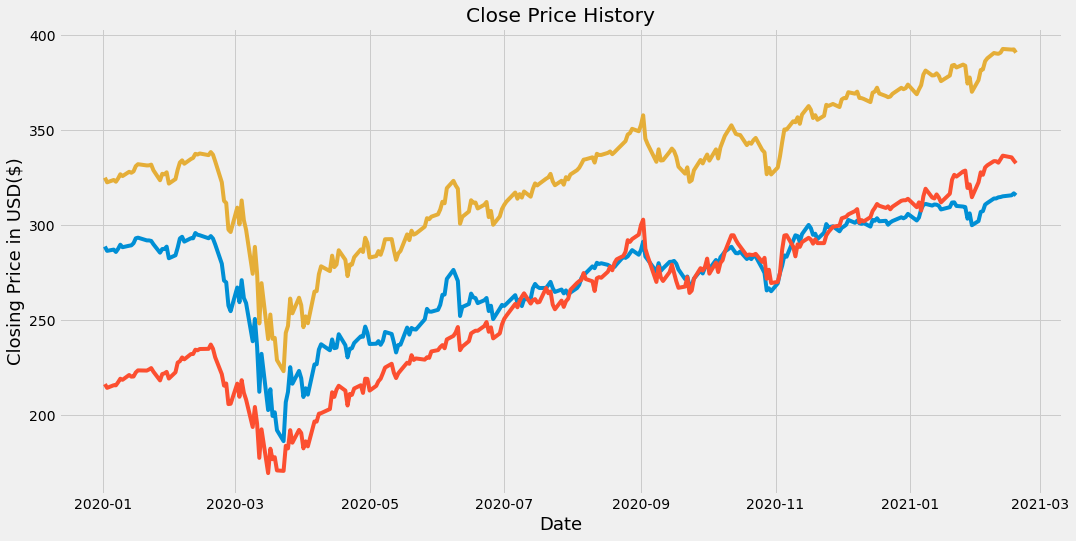

In [21]:
# Visualize the closing price history 
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(etfs_close)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in USD($)', fontsize = 18)

plt.show()

In [22]:
etfs_close['DOW_Chnge']= etfs_close.DIA - etfs_close.DIA.shift(1)
etfs_close['NASDQ_Chnge']= etfs_close.QQQ - etfs_close.QQQ.shift(1)
etfs_close['SPYDR_Chnge']= etfs_close.SPY - etfs_close.SPY.shift(1)
# adding in columns for daily change in closing etf prices

In [23]:
etfs_close['QQQ_per_chnge'] = etfs_close['NASDQ_Chnge'].pct_change().round(4)
etfs_close['DIA_per_chnge'] = etfs_close['DOW_Chnge'].pct_change().round(4)
etfs_close['SPY_per_chnge'] = etfs_close['SPYDR_Chnge'].pct_change().round(4)
# adding in cloumns for percent change

##  Only pulling info on S & P 500 ('SPY').


In [24]:
df1= dr.DataReader('SPY', data_source= 'yahoo', start = '2021-03-03',end= '2021-04-11')
df1 =df1.round(2)
df1.head(2)

High     Low    Open   Close       Volume  Adj Close
Date                                                              
2021-03-03  386.83  381.31  385.79  381.42  119482700.0     380.17
2021-03-04  384.00  371.88  381.22  376.70  182856500.0     375.47

In [25]:
window = 1 
col_pct_chng = "pct_chng" + "_" +str(window)
df1['percent_chng'] = df1.Close.pct_change(window)*100
df1['percent_chng'].round(4).head()

Date
2021-03-03       NaN
2021-03-04   -1.2375
2021-03-05    1.8397
2021-03-08   -0.4979
2021-03-09    1.4277
Name: percent_chng, dtype: float64

In [26]:
df1.head(2)


High     Low    Open   Close       Volume  Adj Close  \
Date                                                                 
2021-03-03  386.83  381.31  385.79  381.42  119482700.0     380.17   
2021-03-04  384.00  371.88  381.22  376.70  182856500.0     375.47   

            percent_chng  
Date                      
2021-03-03           NaN  
2021-03-04     -1.237481

In [27]:
etfs_close.head(4)

DIA     QQQ     SPY  DOW_Chnge  NASDQ_Chnge  SPYDR_Chnge  \
Date                                                                      
2020-01-02  288.62  216.16  324.87        NaN          NaN          NaN   
2020-01-03  286.32  214.18  322.41      -2.30        -1.98        -2.46   
2020-01-06  286.98  215.56  323.64       0.66         1.38         1.23   
2020-01-07  285.74  215.53  322.73      -1.24        -0.03        -0.91   

            QQQ_per_chnge  DIA_per_chnge  SPY_per_chnge  
Date                                                     
2020-01-02            NaN            NaN            NaN  
2020-01-03            NaN            NaN            NaN  
2020-01-06        -1.6970        -1.2870        -1.5000  
2020-01-07        -1.0217        -2.8788        -1.7398

In [28]:
type(etfs_close)

pandas.core.frame.DataFrame

In [29]:
etfs_close['QQQ_per_chnge']

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06    -1.6970
2020-01-07    -1.0217
2020-01-08   -55.0000
               ...   
2021-02-12     0.0219
2021-02-16    -1.4866
2021-02-17     0.7692
2021-02-18    -0.0932
2021-02-19     0.0000
Name: QQQ_per_chnge, Length: 286, dtype: float64

In [30]:
etfs_close['DIA_per_chnge'] 


Date
2020-01-02       NaN
2020-01-03       NaN
2020-01-06   -1.2870
2020-01-07   -2.8788
2020-01-08   -2.3387
               ...  
2021-02-12    1.0000
2021-02-16    0.5000
2021-02-17    0.8889
2021-02-18   -2.0196
2021-02-19    0.0000
Name: DIA_per_chnge, Length: 286, dtype: float64

In [31]:
etfs_close['SPY_per_chnge'] 

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06    -1.5000
2020-01-07    -1.7398
2020-01-08    -2.8901
               ...   
2021-02-12     2.0635
2021-02-16    -1.1762
2021-02-17    -1.2647
2021-02-18   -19.5556
2021-02-19     0.0000
Name: SPY_per_chnge, Length: 286, dtype: float64

In [32]:
etfs_chnge = etfs_close.loc[:,['QQQ_per_chnge','DIA_per_chnge','SPY_per_chnge']].dropna(how = 'all')
etfs_chnge.head(2)

QQQ_per_chnge  DIA_per_chnge  SPY_per_chnge
Date                                                   
2020-01-06        -1.6970        -1.2870        -1.5000
2020-01-07        -1.0217        -2.8788        -1.7398

In [33]:
df1['Closing_Chnge'] = df1.Close - df1.Close.shift(1)

In [34]:
df1.head()

High     Low    Open   Close       Volume  Adj Close  \
Date                                                                 
2021-03-03  386.83  381.31  385.79  381.42  119482700.0     380.17   
2021-03-04  384.00  371.88  381.22  376.70  182856500.0     375.47   
2021-03-05  384.76  372.64  380.46  383.63  151959800.0     382.38   
2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   

            percent_chng  Closing_Chnge  
Date                                     
2021-03-03           NaN            NaN  
2021-03-04     -1.237481          -4.72  
2021-03-05      1.839660           6.93  
2021-03-08     -0.497876          -1.91  
2021-03-09      1.427748           5.45

C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1., 1., 0., 0., 1., 2., 1., 1., 3., 2., 0., 2., 4., 2., 0., 2., 0.,
        1., 2., 1.]),
 array([-5.78  , -5.1445, -4.509 , -3.8735, -3.238 , -2.6025, -1.967 ,
        -1.3315, -0.696 , -0.0605,  0.575 ,  1.2105,  1.846 ,  2.4815,
         3.117 ,  3.7525,  4.388 ,  5.0235,  5.659 ,  6.2945,  6.93  ]),
 <BarContainer object of 20 artists>)

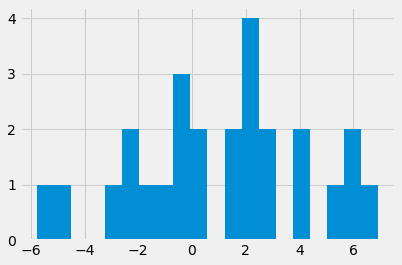

In [35]:
plt.hist(df1['Closing_Chnge'], bins= 20)

### Using Beautiful Soup to scrape headlines from Finviz 

In [36]:
#from urlib.request import urlopen, Request
#! pip install bs4
from bs4 import BeautifulSoup

In [37]:
#!pip install requests
import requests
from urllib.request import urlopen, Request

In [38]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['SPY']

In [39]:
news_tables = {} 

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url = url, headers = {'user-agent':'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = "news-table") 
    news_tables[ticker]= news_table
    
    
print(news_tables)

{'SPY': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Apr-19-21 06:15PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-news-live-updates-april-20-2021-221508218.html" target="_blank">Stock market news live updates: Stock futures tick up after tech stocks dragged indexes below record levels</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>
<tr><td align="right" width="130">12:39PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investopedia.com/united-airlines-q1-2021-earnings-preview-5179429?utm_campaign=quote-yahoo&amp;utm_source=yahoo&amp;utm_medium=referral" target="_blank">United Airlines Earnings: Wh

In [40]:
#print(news_tables)

### Starting scratch code to parse the text from the webpage

In [41]:
# testing code on SPY

spy_data = news_tables['SPY']    
spy_rows = spy_data.find_all('tr')

In [42]:
spy_rows

[<tr><td align="right" style="white-space:nowrap" width="130">Apr-19-21 06:15PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-news-live-updates-april-20-2021-221508218.html" target="_blank">Stock market news live updates: Stock futures tick up after tech stocks dragged indexes below record levels</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>,
 <tr><td align="right" width="130">12:39PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investopedia.com/united-airlines-q1-2021-earnings-preview-5179429?utm_campaign=quote-yahoo&amp;utm_source=yahoo&amp;utm_medium=referral" target="_blank">United Airlines Earnings: What to Look For from UAL</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Investop

In [43]:
for index, row in enumerate(spy_rows):
    title = row.a.text                # this looks for the anchor tag inside each table row and give the text
    timestamp = row.td.text           # pasring the timestamp using the td tag from the table 
    print(timestamp + " " + title)

Apr-19-21 06:15PM   Stock market news live updates: Stock futures tick up after tech stocks dragged indexes below record levels
12:39PM   United Airlines Earnings: What to Look For from UAL
09:46AM   Stock market news live updates: Stocks pull back from record levels, Bitcoin prices steady
05:57AM   Corporate tax hikes don't spell doom for the bull market
Apr-16-21 04:01PM   Stock market news live updates: S&P 500, Dow set fresh record highs amid strong earnings, economic data
Apr-15-21 07:57PM   A Guide to the Iran Nuclear Deal
01:18PM   Stock market news live updates: Stocks jump, S&P 500 and Dow hit record highs after retail sales, jobless claims top estimates
08:31AM   Initial jobless claims drop to fresh pandemic-era low of 576,000
Apr-14-21 05:28PM   Stock market news live updates: Stocks end mixed after bank earnings, Coinbase falls below debut price
12:44PM   Delta Air Lines Earnings: What to Look For From DAL
Apr-13-21 04:05PM   Stock market news live updates: Stocks mixed aft

In [44]:
# creating the parsed data for all tickers

parsed_data = []

for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        
        title = row.a.get_text()
        date_data = row.td.text.split(' ') # splitting the date based on length of timestamp to handle the different types of dates
    
        if len(date_data) == 1:
            time = date_data[0]
        else: 
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
    
print(parsed_data)

[['SPY', 'Apr-19-21', '06:15PM\xa0\xa0', 'Stock market news live updates: Stock futures tick up after tech stocks dragged indexes below record levels'], ['SPY', 'Apr-19-21', '12:39PM\xa0\xa0', 'United Airlines Earnings: What to Look For from UAL'], ['SPY', 'Apr-19-21', '09:46AM\xa0\xa0', 'Stock market news live updates: Stocks pull back from record levels, Bitcoin prices steady'], ['SPY', 'Apr-19-21', '05:57AM\xa0\xa0', "Corporate tax hikes don't spell doom for the bull market"], ['SPY', 'Apr-16-21', '04:01PM\xa0\xa0', 'Stock market news live updates: S&P 500, Dow set fresh record highs amid strong earnings, economic data'], ['SPY', 'Apr-15-21', '07:57PM\xa0\xa0', 'A Guide to the Iran Nuclear Deal'], ['SPY', 'Apr-15-21', '01:18PM\xa0\xa0', 'Stock market news live updates: Stocks jump, S&P 500 and Dow hit record highs after retail sales, jobless claims top estimates'], ['SPY', 'Apr-15-21', '08:31AM\xa0\xa0', 'Initial jobless claims drop to fresh pandemic-era low of 576,000'], ['SPY', 'A

### Using NLTK Vader to analyze sentiment

In [45]:
#!pip install nltk

In [46]:
#nltk.download()

In [47]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [48]:
df = pd.DataFrame(parsed_data, columns =['ticker', 'date', 'time', 'title'] )

In [49]:
df.shape

(100, 4)

In [50]:
df.head()

ticker       date       time  \
0    SPY  Apr-19-21  06:15PM     
1    SPY  Apr-19-21  12:39PM     
2    SPY  Apr-19-21  09:46AM     
3    SPY  Apr-19-21  05:57AM     
4    SPY  Apr-16-21  04:01PM     

                                               title  
0  Stock market news live updates: Stock futures ...  
1  United Airlines Earnings: What to Look For fro...  
2  Stock market news live updates: Stocks pull ba...  
3  Corporate tax hikes don't spell doom for the b...  
4  Stock market news live updates: S&P 500, Dow s...

In [51]:
df.tail()

ticker       date       time  \
95    SPY  Mar-10-21  06:03AM     
96    SPY  Mar-09-21  04:05PM     
97    SPY  Mar-09-21  10:09AM     
98    SPY  Mar-09-21  05:55AM     
99    SPY  Mar-08-21  10:26AM     

                                                title  
95                  Dip buyers were out in full force  
96  Stock market news live updates: Tech stocks st...  
97  How these teens are having fun in todays stock...  
98                 New day, same story: Morning Brief  
99  A glossary of the Federal Reserve's full arsen...

In [52]:
# initializing Vader to analyse text 
vader = SentimentIntensityAnalyzer()

In [53]:
#Example of vader scoring sample text based on the sentiment of words used
print(vader.polarity_scores("I don't think Apple is a horrible company. I think they will do poorly this quarter"))

{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}


In [54]:
# create a new column in dataframe of titles polarity scores 
f = lambda title: vader.polarity_scores(title)['compound']
df['sentiment']= df['title'].apply(f)

In [55]:
# looking at the sentiment of each of article title of df.head()
df.head(10)

ticker       date       time  \
0    SPY  Apr-19-21  06:15PM     
1    SPY  Apr-19-21  12:39PM     
2    SPY  Apr-19-21  09:46AM     
3    SPY  Apr-19-21  05:57AM     
4    SPY  Apr-16-21  04:01PM     
5    SPY  Apr-15-21  07:57PM     
6    SPY  Apr-15-21  01:18PM     
7    SPY  Apr-15-21  08:31AM     
8    SPY  Apr-14-21  05:28PM     
9    SPY  Apr-14-21  12:44PM     

                                               title  sentiment  
0  Stock market news live updates: Stock futures ...    -0.0516  
1  United Airlines Earnings: What to Look For fro...     0.4215  
2  Stock market news live updates: Stocks pull ba...     0.0000  
3  Corporate tax hikes don't spell doom for the b...     0.3089  
4  Stock market news live updates: S&P 500, Dow s...     0.6808  
5                   A Guide to the Iran Nuclear Deal     0.0000  
6  Stock market news live updates: Stocks jump, S...     0.2023  
7  Initial jobless claims drop to fresh pandemic-...    -0.2263  
8  Stock market news live updates: Stocks end mix...     0.0000  
9  Delta Air Lines Earnings: What to Look For Fro...     0.0000

In [56]:
df.tail()

ticker       date       time  \
95    SPY  Mar-10-21  06:03AM     
96    SPY  Mar-09-21  04:05PM     
97    SPY  Mar-09-21  10:09AM     
98    SPY  Mar-09-21  05:55AM     
99    SPY  Mar-08-21  10:26AM     

                                                title  sentiment  
95                  Dip buyers were out in full force     0.0000  
96  Stock market news live updates: Tech stocks st...     0.0000  
97  How these teens are having fun in todays stock...     0.5106  
98                 New day, same story: Morning Brief     0.0000  
99  A glossary of the Federal Reserve's full arsen...     0.0000

In [57]:
# modifying the date column convrting into a date time format

df['Date']= pd.to_datetime(df.date).dt.date

In [58]:
%matplotlib inline

In [59]:
# run regression by Friday of lag in sentiment .... 

### Merging the two dataframes "df1" and avg_df to create a sentiment column.  

In [60]:
df1.head(3)


High     Low    Open   Close       Volume  Adj Close  \
Date                                                                 
2021-03-03  386.83  381.31  385.79  381.42  119482700.0     380.17   
2021-03-04  384.00  371.88  381.22  376.70  182856500.0     375.47   
2021-03-05  384.76  372.64  380.46  383.63  151959800.0     382.38   

            percent_chng  Closing_Chnge  
Date                                     
2021-03-03           NaN            NaN  
2021-03-04     -1.237481          -4.72  
2021-03-05      1.839660           6.93

In [61]:
# this will return the daily average of each ticker's sentiment score
avg_df = df.groupby(['date']).mean()
#avg_df = avg_df.unstack()
#avg_df = avg_df.xs('sentiment',axis = "columns").transpose()

In [62]:
avg_df.shape

(37, 1)

In [63]:
avg_df.head(3)

sentiment
date                
Apr-01-21   0.118775
Apr-02-21  -0.025100
Apr-04-21   0.000000

In [64]:
avg_df.to_csv('Stock Sentiment.csv', index = True)

In [65]:
Sentiment = pd.read_csv('Stock Sentiment.csv')
Sentiment

date  sentiment
0   Apr-01-21   0.118775
1   Apr-02-21  -0.025100
2   Apr-04-21   0.000000
3   Apr-05-21   0.000000
4   Apr-06-21  -0.278700
5   Apr-07-21   0.210060
6   Apr-08-21  -0.006400
7   Apr-09-21   0.146800
8   Apr-10-21  -0.025900
9   Apr-11-21   0.000000
10  Apr-12-21   0.051350
11  Apr-13-21  -0.312450
12  Apr-14-21   0.000000
13  Apr-15-21  -0.008000
14  Apr-16-21   0.680800
15  Apr-19-21   0.169700
16  Mar-08-21   0.000000
17  Mar-09-21   0.170200
18  Mar-10-21   0.224317
19  Mar-11-21  -0.178400
20  Mar-12-21   0.000000
21  Mar-14-21   0.000000
22  Mar-15-21   0.000000
23  Mar-16-21   0.199000
24  Mar-17-21  -0.163550
25  Mar-18-21   0.099700
26  Mar-19-21   0.000000
27  Mar-21-21   0.000000
28  Mar-22-21   0.409667
29  Mar-23-21  -0.053525
30  Mar-24-21   0.000000
31  Mar-25-21   0.081320
32  Mar-26-21   0.178525
33  Mar-28-21   0.510600
34  Mar-29-21   0.200950
35  Mar-30-21  -0.467750
36  Mar-31-21  -0.286650

In [66]:
#avg_df['Date']= pd.to_datetime(avg_df.date).dt.date

In [67]:
Sentiment.rename(columns = {'date':'Date','sentiment':'Sentiment'}, inplace = True)
Sentiment.head(2)

Date  Sentiment
0  Apr-01-21   0.118775
1  Apr-02-21  -0.025100

In [68]:
#change the format of Sentiment date column to match in date in df1
Sentiment.Date.head(2)

0    Apr-01-21
1    Apr-02-21
Name: Date, dtype: object

In [69]:
Sentiment.Date = pd.to_datetime(Sentiment.Date)

In [70]:
df1.shape,df.shape

((27, 8), (100, 6))

In [71]:
Sentiment.dtypes

Date         datetime64[ns]
Sentiment           float64
dtype: object

In [72]:
df.loc[1]

ticker                                                     SPY
date                                                 Apr-19-21
time                                                 12:39PM  
title        United Airlines Earnings: What to Look For fro...
sentiment                                               0.4215
Date                                                2021-04-19
Name: 1, dtype: object

In [73]:
#df1.info()

In [74]:
df.columns

Index(['ticker', 'date', 'time', 'title', 'sentiment', 'Date'], dtype='object')

In [75]:
df1.shape

(27, 8)

In [76]:
df1 = df1.reset_index()
df1.head(2)

Date    High     Low    Open   Close       Volume  Adj Close  \
0 2021-03-03  386.83  381.31  385.79  381.42  119482700.0     380.17   
1 2021-03-04  384.00  371.88  381.22  376.70  182856500.0     375.47   

   percent_chng  Closing_Chnge  
0           NaN            NaN  
1     -1.237481          -4.72

In [77]:
df1.shape

(27, 9)

In [78]:
df1.Date.head(2)

0   2021-03-03
1   2021-03-04
Name: Date, dtype: datetime64[ns]

In [79]:
df1

Date    High     Low    Open   Close       Volume  Adj Close  \
0  2021-03-03  386.83  381.31  385.79  381.42  119482700.0     380.17   
1  2021-03-04  384.00  371.88  381.22  376.70  182856500.0     375.47   
2  2021-03-05  384.76  372.64  380.46  383.63  151959800.0     382.38   
3  2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
4  2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   
5  2021-03-10  391.40  388.17  389.69  389.58  109660800.0     388.31   
6  2021-03-11  395.65  391.74  392.23  393.53   86027400.0     392.25   
7  2021-03-12  394.21  391.20  392.07  394.06   64608100.0     392.77   
8  2021-03-15  396.69  392.03  394.33  396.41   73427200.0     395.12   
9  2021-03-16  397.83  395.08  397.07  395.91   72958000.0     394.62   
10 2021-03-17  398.12  393.30  394.53  397.26   91822000.0     395.96   
11 2021-03-18  396.72  390.75  394.48  391.48  115112500.0     390.20   
12 2021-03-19  391.57  387.15  389.88  389.48  112777800.0     389.48   
13 2021-03-22  394.07  389.97  390.03  392.59   73778600.0     392.59   
14 2021-03-23  393.46  388.66  391.91  389.50   90686600.0     389.50   
15 2021-03-24  392.75  387.47  391.00  387.52   97588600.0     387.52   
16 2021-03-25  390.55  383.90  385.98  389.70  116128600.0     389.70   
17 2021-03-26  396.41  390.29  390.93  395.98  113023400.0     395.98   
18 2021-03-29  396.75  392.81  394.40  395.78  108107600.0     395.78   
19 2021-03-30  395.45  393.02  394.42  394.73   76262200.0     394.73   
20 2021-03-31  398.00  395.31  395.34  396.33  112734200.0     396.33   
21 2021-04-01  400.67  398.18  398.40  400.61   99599100.0     400.61   
22 2021-04-05  406.94  403.38  403.46  406.36   91684800.0     406.36   
23 2021-04-06  407.24  405.40  405.76  406.12   62021000.0     406.12   
24 2021-04-07  406.96  405.45  405.94  406.59   55836300.0     406.59   
25 2021-04-08  408.58  406.93  407.93  408.52   57863100.0     408.52   
26 2021-04-09  411.67  408.26  408.39  411.49   61060100.0     411.49   

    percent_chng  Closing_Chnge  
0            NaN            NaN  
1      -1.237481          -4.72  
2       1.839660           6.93  
3      -0.497876          -1.91  
4       1.427748           5.45  
5       0.622466           2.41  
6       1.013912           3.95  
7       0.134678           0.53  
8       0.596356           2.35  
9      -0.126132          -0.50  
10      0.340987           1.35  
11     -1.454967          -5.78  
12     -0.510882          -2.00  
13      0.798501           3.11  
14     -0.787081          -3.09  
15     -0.508344          -1.98  
16      0.562552           2.18  
17      1.611496           6.28  
18     -0.050508          -0.20  
19     -0.265299          -1.05  
20      0.405340           1.60  
21      1.079908           4.28  
22      1.435311           5.75  
23     -0.059061          -0.24  
24      0.115729           0.47  
25      0.474680           1.93  
26      0.727015           2.97

In [80]:
avg_df = avg_df.reset_index()
avg_df.head()

date  sentiment
0  Apr-01-21   0.118775
1  Apr-02-21  -0.025100
2  Apr-04-21   0.000000
3  Apr-05-21   0.000000
4  Apr-06-21  -0.278700

## Merge the Sentiment with Closing stock prices

In [81]:
Senti_close = pd.merge(df1,Sentiment, left_on = 'Date', right_on = 'Date')

In [82]:
Senti_close

Date    High     Low    Open   Close       Volume  Adj Close  \
0  2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
1  2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   
2  2021-03-10  391.40  388.17  389.69  389.58  109660800.0     388.31   
3  2021-03-11  395.65  391.74  392.23  393.53   86027400.0     392.25   
4  2021-03-12  394.21  391.20  392.07  394.06   64608100.0     392.77   
5  2021-03-15  396.69  392.03  394.33  396.41   73427200.0     395.12   
6  2021-03-16  397.83  395.08  397.07  395.91   72958000.0     394.62   
7  2021-03-17  398.12  393.30  394.53  397.26   91822000.0     395.96   
8  2021-03-18  396.72  390.75  394.48  391.48  115112500.0     390.20   
9  2021-03-19  391.57  387.15  389.88  389.48  112777800.0     389.48   
10 2021-03-22  394.07  389.97  390.03  392.59   73778600.0     392.59   
11 2021-03-23  393.46  388.66  391.91  389.50   90686600.0     389.50   
12 2021-03-24  392.75  387.47  391.00  387.52   97588600.0     387.52   
13 2021-03-25  390.55  383.90  385.98  389.70  116128600.0     389.70   
14 2021-03-26  396.41  390.29  390.93  395.98  113023400.0     395.98   
15 2021-03-29  396.75  392.81  394.40  395.78  108107600.0     395.78   
16 2021-03-30  395.45  393.02  394.42  394.73   76262200.0     394.73   
17 2021-03-31  398.00  395.31  395.34  396.33  112734200.0     396.33   
18 2021-04-01  400.67  398.18  398.40  400.61   99599100.0     400.61   
19 2021-04-05  406.94  403.38  403.46  406.36   91684800.0     406.36   
20 2021-04-06  407.24  405.40  405.76  406.12   62021000.0     406.12   
21 2021-04-07  406.96  405.45  405.94  406.59   55836300.0     406.59   
22 2021-04-08  408.58  406.93  407.93  408.52   57863100.0     408.52   
23 2021-04-09  411.67  408.26  408.39  411.49   61060100.0     411.49   

    percent_chng  Closing_Chnge  Sentiment  
0      -0.497876          -1.91   0.000000  
1       1.427748           5.45   0.170200  
2       0.622466           2.41   0.224317  
3       1.013912           3.95  -0.178400  
4       0.134678           0.53   0.000000  
5       0.596356           2.35   0.000000  
6      -0.126132          -0.50   0.199000  
7       0.340987           1.35  -0.163550  
8      -1.454967          -5.78   0.099700  
9      -0.510882          -2.00   0.000000  
10      0.798501           3.11   0.409667  
11     -0.787081          -3.09  -0.053525  
12     -0.508344          -1.98   0.000000  
13      0.562552           2.18   0.081320  
14      1.611496           6.28   0.178525  
15     -0.050508          -0.20   0.200950  
16     -0.265299          -1.05  -0.467750  
17      0.405340           1.60  -0.286650  
18      1.079908           4.28   0.118775  
19      1.435311           5.75   0.000000  
20     -0.059061          -0.24  -0.278700  
21      0.115729           0.47   0.210060  
22      0.474680           1.93  -0.006400  
23      0.727015           2.97   0.146800

In [83]:
#adding a column ofsentiment "lag"

Senti_close['Lag'] = Senti_close['Sentiment'] - Senti_close['Sentiment'].shift(-1)

# Adding a column"Spred" to show the delta in daily high versus low ("Volatility") 

Senti_close['Spread'] = Senti_close['High'] - Senti_close['Low']


Senti_close['Ticker'] =  'SPY'
Senti_close.head(2)

Date    High     Low    Open   Close       Volume  Adj Close  \
0 2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
1 2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   

   percent_chng  Closing_Chnge  Sentiment       Lag  Spread Ticker  
0     -0.497876          -1.91     0.0000 -0.170200    6.26    SPY  
1      1.427748           5.45     0.1702 -0.054117    4.60    SPY

In [84]:
# Simplifying Data table
Simple = Senti_close[Senti_close.Ticker == 'SPY'][['Date','Closing_Chnge','Sentiment',"Lag"]]
Simple

Date  Closing_Chnge  Sentiment       Lag
0  2021-03-08          -1.91   0.000000 -0.170200
1  2021-03-09           5.45   0.170200 -0.054117
2  2021-03-10           2.41   0.224317  0.402717
3  2021-03-11           3.95  -0.178400 -0.178400
4  2021-03-12           0.53   0.000000  0.000000
5  2021-03-15           2.35   0.000000 -0.199000
6  2021-03-16          -0.50   0.199000  0.362550
7  2021-03-17           1.35  -0.163550 -0.263250
8  2021-03-18          -5.78   0.099700  0.099700
9  2021-03-19          -2.00   0.000000 -0.409667
10 2021-03-22           3.11   0.409667  0.463192
11 2021-03-23          -3.09  -0.053525 -0.053525
12 2021-03-24          -1.98   0.000000 -0.081320
13 2021-03-25           2.18   0.081320 -0.097205
14 2021-03-26           6.28   0.178525 -0.022425
15 2021-03-29          -0.20   0.200950  0.668700
16 2021-03-30          -1.05  -0.467750 -0.181100
17 2021-03-31           1.60  -0.286650 -0.405425
18 2021-04-01           4.28   0.118775  0.118775
19 2021-04-05           5.75   0.000000  0.278700
20 2021-04-06          -0.24  -0.278700 -0.488760
21 2021-04-07           0.47   0.210060  0.216460
22 2021-04-08           1.93  -0.006400 -0.153200
23 2021-04-09           2.97   0.146800       NaN

In [85]:
Simple.corr()

Closing_Chnge  Sentiment       Lag
Closing_Chnge       1.000000   0.223955  0.130193
Sentiment           0.223955   1.000000  0.739759
Lag                 0.130193   0.739759  1.000000

Text(0, 0.5, 'Sentiment')

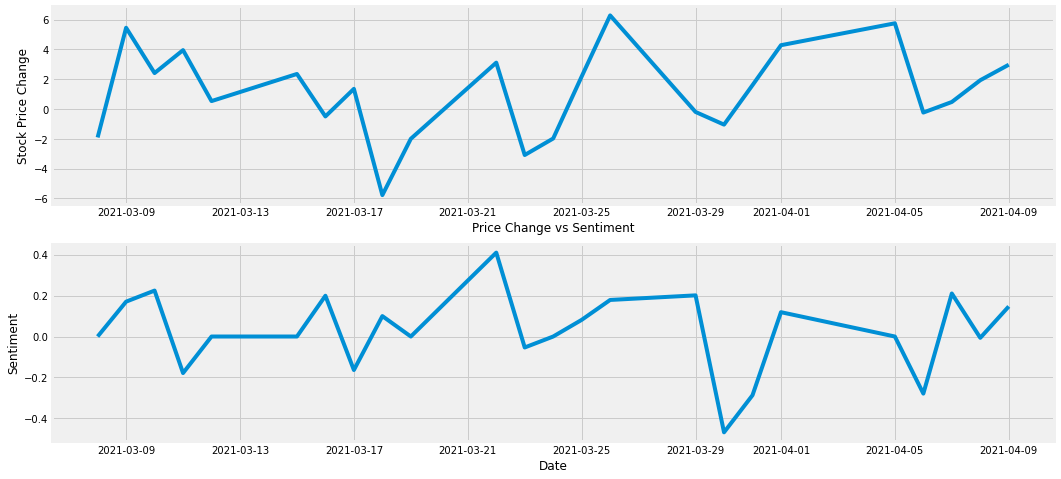

In [86]:
sym = 'SPY'

plt.figure(figsize=(16,8))

x = Senti_close[Senti_close.Ticker == sym].Date
y1 =Senti_close[Senti_close.Ticker == sym].Closing_Chnge
y2 =Senti_close[Senti_close.Ticker == sym].Sentiment 
y3 =Senti_close[Senti_close.Ticker == sym].Lag 

plt.subplot(2,1,1)
plt.plot(x,y1)
plt.xlabel('Price Change vs Sentiment')
plt.ylabel('Stock Price Change')

plt.subplot(2,1,2)
plt.plot(x,y2)
plt.xlabel('Date')
plt.ylabel('Sentiment')



Text(0.5, 1.0, 'Price Change vs Sentiment Score')

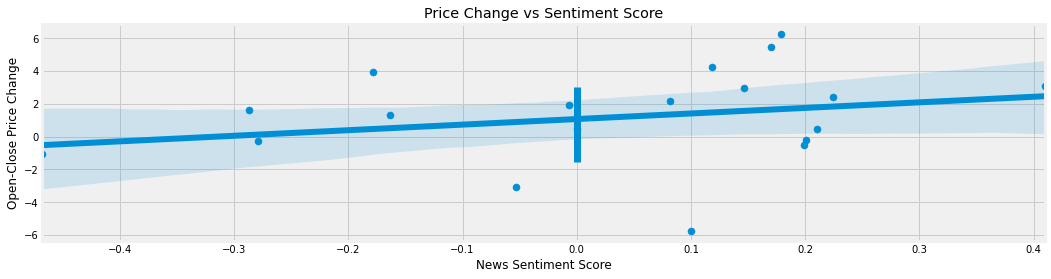

In [87]:
# Using a regression plot to further show correlation between the sentiment and closing prices.

import seaborn as sns 

sym = 'SPY'
plt.figure(figsize=(16,4))

ax = sns.regplot(x ='Sentiment', y='Closing_Chnge', data=Senti_close[Senti_close.Ticker == sym], x_estimator=np.mean)
plt.xlabel('News Sentiment Score')
plt.ylabel('Open-Close Price Change')
plt.title('Price Change vs Sentiment Score')

### Correlation between delta of closing prices and sentiment

In [88]:
# Correlation between closing price and sentiment score
Senti_close.corr()

High       Low      Open     Close    Volume  Adj Close  \
High           1.000000  0.987993  0.983834  0.980876 -0.669123   0.978039   
Low            0.987993  1.000000  0.989616  0.978275 -0.714129   0.974862   
Open           0.983834  0.989616  1.000000  0.956922 -0.710673   0.953591   
Close          0.980876  0.978275  0.956922  1.000000 -0.689950   0.997237   
Volume        -0.669123 -0.714129 -0.710673 -0.689950  1.000000  -0.675860   
Adj Close      0.978039  0.974862  0.953591  0.997237 -0.675860   1.000000   
percent_chng   0.205476  0.200576  0.084040  0.315158 -0.048906   0.309749   
Closing_Chnge  0.216661  0.211359  0.095382  0.325829 -0.056038   0.320614   
Sentiment     -0.070752 -0.100446 -0.112700 -0.059067  0.084474  -0.061340   
Lag            0.008135  0.019051  0.004407  0.028693 -0.008419   0.026096   
Spread        -0.630386 -0.742750 -0.708598 -0.664438  0.688310  -0.659585   

               percent_chng  Closing_Chnge  Sentiment       Lag    Spread  
High               0.205476       0.216661  -0.070752  0.008135 -0.630386  
Low                0.200576       0.211359  -0.100446  0.019051 -0.742750  
Open               0.084040       0.095382  -0.112700  0.004407 -0.708598  
Close              0.315158       0.325829  -0.059067  0.028693 -0.664438  
Volume            -0.048906      -0.056038   0.084474 -0.008419  0.688310  
Adj Close          0.309749       0.320614  -0.061340  0.026096 -0.659585  
percent_chng       1.000000       0.999828   0.226431  0.130184 -0.117307  
Closing_Chnge      0.999828       1.000000   0.223955  0.130193 -0.123012  
Sentiment          0.226431       0.223955   1.000000  0.739759  0.198070  
Lag                0.130184       0.130193   0.739759  1.000000 -0.055913  
Spread            -0.117307      -0.123012   0.198070 -0.055913  1.000000

In [89]:
Senti_close.Closing_Chnge.corr(Senti_close.Sentiment)

0.22395452026243595

In [90]:
Senti_close.percent_chng.corr(Senti_close.Sentiment)

0.2264312209460931

In [91]:
Senti_close.Lag.corr(Senti_close.Sentiment)

0.7397586508439138

In [92]:
Senti_close.Closing_Chnge.corr(Senti_close.Lag)

0.13019254514396872

### Mean and standard deviation of sentiment

In [93]:
Senti_close.Sentiment.mean()

0.025180763888888874

In [94]:
std =Senti_close.Sentiment.std()
std

0.1956257698100204

In [95]:
# Let's look at the High compared to Low as delta.

Senti_close[['Date','High',"Low",'Open','Close','percent_chng','Sentiment']].head()

Date    High     Low    Open   Close  percent_chng  Sentiment
0 2021-03-08  387.68  381.42  384.66  381.72     -0.497876   0.000000
1 2021-03-09  389.91  385.31  385.85  387.17      1.427748   0.170200
2 2021-03-10  391.40  388.17  389.69  389.58      0.622466   0.224317
3 2021-03-11  395.65  391.74  392.23  393.53      1.013912  -0.178400
4 2021-03-12  394.21  391.20  392.07  394.06      0.134678   0.000000

In [96]:
inspect = Senti_close[['Date','High',"Low",'percent_chng','Sentiment']]
inspect.corr()

High       Low  percent_chng  Sentiment
High          1.000000  0.987993      0.205476  -0.070752
Low           0.987993  1.000000      0.200576  -0.100446
percent_chng  0.205476  0.200576      1.000000   0.226431
Sentiment    -0.070752 -0.100446      0.226431   1.000000

In [97]:
new_df = Senti_close
new_df.head()

Date    High     Low    Open   Close       Volume  Adj Close  \
0 2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
1 2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   
2 2021-03-10  391.40  388.17  389.69  389.58  109660800.0     388.31   
3 2021-03-11  395.65  391.74  392.23  393.53   86027400.0     392.25   
4 2021-03-12  394.21  391.20  392.07  394.06   64608100.0     392.77   

   percent_chng  Closing_Chnge  Sentiment       Lag  Spread Ticker  
0     -0.497876          -1.91   0.000000 -0.170200    6.26    SPY  
1      1.427748           5.45   0.170200 -0.054117    4.60    SPY  
2      0.622466           2.41   0.224317  0.402717    3.23    SPY  
3      1.013912           3.95  -0.178400 -0.178400    3.91    SPY  
4      0.134678           0.53   0.000000  0.000000    3.01    SPY

In [98]:
new_df['Hi_Lo'] = ((new_df.High - new_df.Low)/new_df.High)
new_df.head()

Date    High     Low    Open   Close       Volume  Adj Close  \
0 2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
1 2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   
2 2021-03-10  391.40  388.17  389.69  389.58  109660800.0     388.31   
3 2021-03-11  395.65  391.74  392.23  393.53   86027400.0     392.25   
4 2021-03-12  394.21  391.20  392.07  394.06   64608100.0     392.77   

   percent_chng  Closing_Chnge  Sentiment       Lag  Spread Ticker     Hi_Lo  
0     -0.497876          -1.91   0.000000 -0.170200    6.26    SPY  0.016147  
1      1.427748           5.45   0.170200 -0.054117    4.60    SPY  0.011798  
2      0.622466           2.41   0.224317  0.402717    3.23    SPY  0.008252  
3      1.013912           3.95  -0.178400 -0.178400    3.91    SPY  0.009882  
4      0.134678           0.53   0.000000  0.000000    3.01    SPY  0.007636

#### After considering the correlation between various columns and sentiment, stock price predictions are best made with more emphasis on historical trends established in data. Idealogically, "Buying the news and selling the rumor" causes lags in moving many metrics and stock volatility.  

#  Predicting the closing price stock price of S&P500 etf

In [99]:
from pandas_datareader.data import DataReader

#Get the stock quote
sdf = DataReader('SPY', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
sdf

High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03  128.380005  127.430000  127.760002  127.500000  193697900.0   
2012-01-04  127.809998  126.709999  127.199997  127.699997  127186500.0   
2012-01-05  128.229996  126.430000  127.010002  128.039993  173895000.0   
2012-01-06  128.220001  127.290001  128.199997  127.709999  148050000.0   
2012-01-09  128.179993  127.410004  128.000000  128.020004   99530200.0   
...                ...         ...         ...         ...          ...   
2021-04-13  413.529999  411.119995  411.529999  412.859985   56551000.0   
2021-04-14  413.959991  410.869995  412.829987  411.450012   61659900.0   
2021-04-15  416.160004  413.690002  413.739990  415.869995   60229800.0   
2021-04-16  417.910004  415.730011  417.250000  417.260010   82004500.0   
2021-04-19  416.739990  413.790009  416.260010  415.209991   78669737.0   

             Adj Close  
Date                    
2012-01-03  106.331924  
2012-01-04  106.498711  
2012-01-05  106.782272  
2012-01-06  106.507057  
2012-01-09  106.765602  
...                ...  
2021-04-13  412.859985  
2021-04-14  411.450012  
2021-04-15  415.869995  
2021-04-16  417.260010  
2021-04-19  415.209991  

[2338 rows x 6 columns]

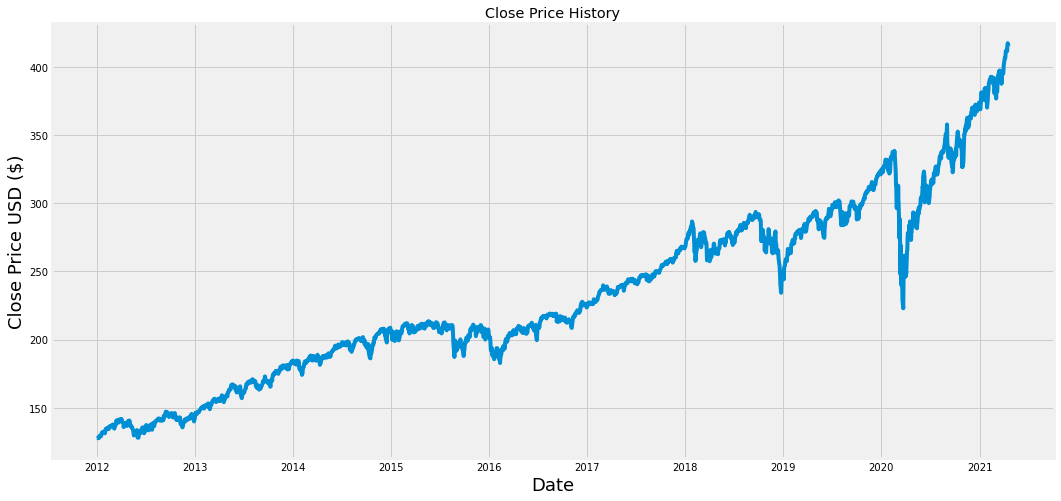

In [100]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(sdf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [101]:
#Create a new dataframe with only the 'Close column
data = sdf.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1871

In [102]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [6.90215839e-04],
       [1.86358803e-03],
       ...,
       [9.95202876e-01],
       [1.00000000e+00],
       [9.92925117e-01]])

In [103]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.00069022, 0.00186359, 0.00072473, 0.0017946 ,
       0.00562536, 0.00586691, 0.00693676, 0.0046245 , 0.00635007,
       0.01128522, 0.01366651, 0.01535753, 0.01418415, 0.01366651,
       0.01746272, 0.01511597, 0.01490891, 0.01335586, 0.01318335,
       0.01715213, 0.01787684, 0.02429595, 0.02398536, 0.02515873,
       0.02653921, 0.0271259 , 0.02367477, 0.0271259 , 0.02653921,
       0.02436498, 0.02950719, 0.0307496 , 0.03095666, 0.02943815,
       0.03150885, 0.03254415, 0.03333795, 0.03471838, 0.03285479,
       0.03530506, 0.0338556 , 0.03192297, 0.02502071, 0.02826478,
       0.03292377, 0.03475292, 0.03478742, 0.04334621, 0.04282856,
       0.04562397, 0.0441745 , 0.04607263, 0.04465765, 0.04386391,
       0.04037823, 0.04193123, 0.04869547, 0.04717697, 0.04476118])]
[0.043932893769005]

[array([0.        , 0.00069022, 0.00186359, 0.00072473, 0.0017946 ,
       0.00562536, 0.00586691, 0.00693676, 0.0046245 , 0.00635007,
       0.01128522, 0.01366651, 0.0153

In [104]:
from keras.models import Sequential
from keras.layers import Dense, LSTM



#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1811/1811 [==============================] - 23s 13ms/step - loss: 6.5804e-04


In [105]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

20.204842032964603

C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


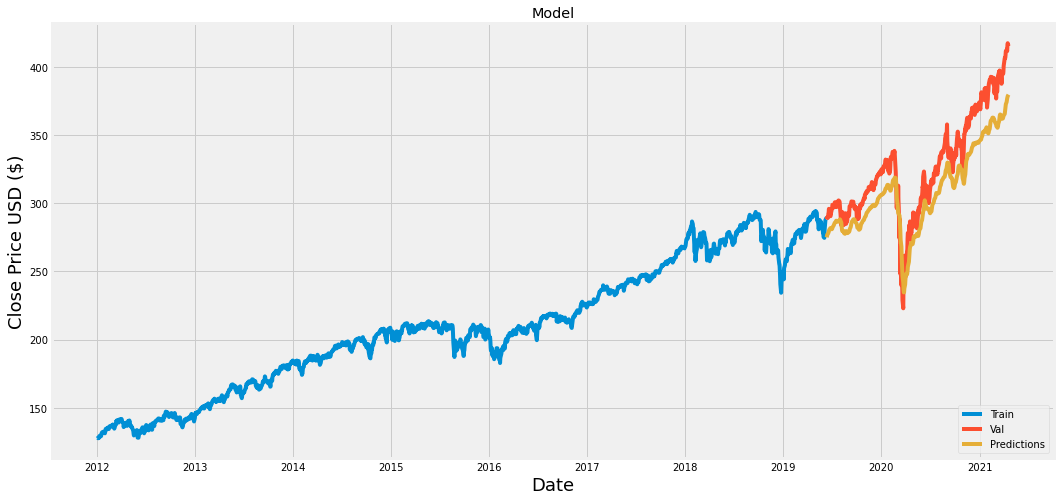

In [106]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [107]:
#Show the valid and predicted prices
valid

Close  Predictions
Date                               
2019-06-12  288.390015   274.943115
2019-06-13  289.579987   276.105133
2019-06-14  289.260010   277.063934
2019-06-17  289.369995   277.738159
2019-06-18  292.399994   278.182495
...                ...          ...
2021-04-13  412.859985   375.513367
2021-04-14  411.450012   376.728210
2021-04-15  415.869995   377.499207
2021-04-16  417.260010   378.470917
2021-04-19  415.209991   379.530151

[467 rows x 2 columns]

In [108]:
valid.describe()

Close  Predictions
count  467.000000   467.000000
mean   325.748159   308.014648
std     37.960312    30.584757
min    222.949997   234.635681
25%    297.860001   285.362579
50%    320.899994   303.867096
75%    349.720001   326.568436
max    417.260010   379.530151

In [109]:
valid = pd.DataFrame(valid)
type(valid)

pandas.core.frame.DataFrame

In [110]:
# Hold is the delta between closing price and predicted closing price
valid['Hold'] = valid['Close'] - valid['Predictions']
valid

Close  Predictions       Hold
Date                                          
2019-06-12  288.390015   274.943115  13.446899
2019-06-13  289.579987   276.105133  13.474854
2019-06-14  289.260010   277.063934  12.196075
2019-06-17  289.369995   277.738159  11.631836
2019-06-18  292.399994   278.182495  14.217499
...                ...          ...        ...
2021-04-13  412.859985   375.513367  37.346619
2021-04-14  411.450012   376.728210  34.721802
2021-04-15  415.869995   377.499207  38.370789
2021-04-16  417.260010   378.470917  38.789093
2021-04-19  415.209991   379.530151  35.679840

[467 rows x 3 columns]

In [111]:
valid['Hold']= abs(valid['Hold']) # taking the absolute value of hold entries

In [112]:
#binwidth= int((max(valid['Hold'])-min(valid['Hold']))/3)
#binwidth

In [113]:
# creating bins 
bins = [0,1.99,20]

valid['buy_sell']= pd.cut(valid['Hold'],bins, labels=['High','Low'])

In [114]:
valid.head(2)

Close  Predictions       Hold buy_sell
Date                                                   
2019-06-12  288.390015   274.943115  13.446899      Low
2019-06-13  289.579987   276.105133  13.474854      Low

In [115]:
(valid[['buy_sell']]== "High").value_counts()# buy_sell indicates buy if hold is close indicated by "high" 

buy_sell
False       462
True          5
dtype: int64

In [116]:
# insert binary descript of predictions based on small delta between predictions and actual 

def binary_conv(x):
    if x == 'High':
        return 1
    if x == "Low":
        return 0 
    

In [117]:
#creating a Purchase column based on but_sell data 
valid['Purchase']=valid['buy_sell'].apply(binary_conv)

In [118]:
valid.describe()

Close  Predictions        Hold
count  467.000000   467.000000  467.000000
mean   325.748159   308.014648   18.553125
std     37.960312    30.584757    8.009655
min    222.949997   234.635681    0.115189
25%    297.860001   285.362579   13.459076
50%    320.899994   303.867096   17.242615
75%    349.720001   326.568436   23.513435
max    417.260010   379.530151   40.929535

In [119]:
valid.head()

Close  Predictions       Hold buy_sell Purchase
Date                                                            
2019-06-12  288.390015   274.943115  13.446899      Low        0
2019-06-13  289.579987   276.105133  13.474854      Low        0
2019-06-14  289.260010   277.063934  12.196075      Low        0
2019-06-17  289.369995   277.738159  11.631836      Low        0
2019-06-18  292.399994   278.182495  14.217499      Low        0

#### Older ideas  for creating bins... have a new idea below that seems to work too...

In [120]:
#df_bin = df[['vaccine_refusal']]*1000

#df_bin.dropna(inplace=True)

#df_bin = pd.DataFrame(df_bin)

#binwidth= int((max(df_bin['vaccine_refusal'])-min(df_bin['vaccine_refusal']))/2)

#bins = range(int(min(df_bin['vaccine_refusal'])),int(max(df_bin['vaccine_refusal'])),binwidth)

#df['Level_Vaccine_Refusal']= pd.cut(df_bin['vaccine_refusal'],bins, labels=['Low', 'High'])

In [121]:
#predictions

In [122]:
#pred = pd.DataFrame(predictions, columns=['buy_sell'])
#pred.head(3)

In [123]:
#df_bin = pred[['buy_sell']]*2.5
#df_bin.head(3)

In [124]:
#df_bin.dropna(inplace=True)

In [125]:
#binwidth= int((max(df_bin['buy_sell'])-min(df_bin['buy_sell']))/3)
#binwidth

In [126]:
#bins = range(int(min(df_bin['buy_sell'])),int(max(df_bin['buy_sell'])),binwidth)

#valid['buy_sell']= pd.cut(df_bin['buy_sell'],bins, labels=['Low', 'Mid', 'High'])

In [127]:
bins

[0, 1.99, 20]

In [128]:
# checking to see if changes are in dataframe
valid

Close  Predictions       Hold buy_sell Purchase
Date                                                            
2019-06-12  288.390015   274.943115  13.446899      Low        0
2019-06-13  289.579987   276.105133  13.474854      Low        0
2019-06-14  289.260010   277.063934  12.196075      Low        0
2019-06-17  289.369995   277.738159  11.631836      Low        0
2019-06-18  292.399994   278.182495  14.217499      Low        0
...                ...          ...        ...      ...      ...
2021-04-13  412.859985   375.513367  37.346619      NaN      NaN
2021-04-14  411.450012   376.728210  34.721802      NaN      NaN
2021-04-15  415.869995   377.499207  38.370789      NaN      NaN
2021-04-16  417.260010   378.470917  38.789093      NaN      NaN
2021-04-19  415.209991   379.530151  35.679840      NaN      NaN

[467 rows x 5 columns]

In [129]:
# using a function to create bins
valid.fillna({'buy_sell':"High"}, inplace = True)

def binary_conv(x):
    if x == 'High':
        return 1
    if x == "Low":
        return 0 

valid['Purchase']=valid['buy_sell'].apply(binary_conv)

In [130]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 467 entries, 2019-06-12 to 2021-04-19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Close        467 non-null    float64 
 1   Predictions  467 non-null    float32 
 2   Hold         467 non-null    float64 
 3   buy_sell     467 non-null    category
 4   Purchase     467 non-null    category
dtypes: category(2), float32(1), float64(2)
memory usage: 13.9 KB


In [131]:
# developing new model using Senti_close as "new_df" but dropping Ticker and Hi_lo columns
#new_df = new_df.drop(['Ticker','Hi_Lo'], axis = 1)
#new_df.head()

In [132]:
new_df.head()

Date    High     Low    Open   Close       Volume  Adj Close  \
0 2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
1 2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   
2 2021-03-10  391.40  388.17  389.69  389.58  109660800.0     388.31   
3 2021-03-11  395.65  391.74  392.23  393.53   86027400.0     392.25   
4 2021-03-12  394.21  391.20  392.07  394.06   64608100.0     392.77   

   percent_chng  Closing_Chnge  Sentiment       Lag  Spread Ticker     Hi_Lo  
0     -0.497876          -1.91   0.000000 -0.170200    6.26    SPY  0.016147  
1      1.427748           5.45   0.170200 -0.054117    4.60    SPY  0.011798  
2      0.622466           2.41   0.224317  0.402717    3.23    SPY  0.008252  
3      1.013912           3.95  -0.178400 -0.178400    3.91    SPY  0.009882  
4      0.134678           0.53   0.000000  0.000000    3.01    SPY  0.007636

In [133]:
# Dropping the date cloumn before use in model... it gave an error
#newdf2 = new_df.drop('Date', 1)

In [134]:
newdf2= new_df


In [135]:
newdf2.isnull().sum()

Date             0
High             0
Low              0
Open             0
Close            0
Volume           0
Adj Close        0
percent_chng     0
Closing_Chnge    0
Sentiment        0
Lag              1
Spread           0
Ticker           0
Hi_Lo            0
dtype: int64

In [136]:
type(newdf2)

pandas.core.frame.DataFrame

In [137]:
newdf2.head()

Date    High     Low    Open   Close       Volume  Adj Close  \
0 2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
1 2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   
2 2021-03-10  391.40  388.17  389.69  389.58  109660800.0     388.31   
3 2021-03-11  395.65  391.74  392.23  393.53   86027400.0     392.25   
4 2021-03-12  394.21  391.20  392.07  394.06   64608100.0     392.77   

   percent_chng  Closing_Chnge  Sentiment       Lag  Spread Ticker     Hi_Lo  
0     -0.497876          -1.91   0.000000 -0.170200    6.26    SPY  0.016147  
1      1.427748           5.45   0.170200 -0.054117    4.60    SPY  0.011798  
2      0.622466           2.41   0.224317  0.402717    3.23    SPY  0.008252  
3      1.013912           3.95  -0.178400 -0.178400    3.91    SPY  0.009882  
4      0.134678           0.53   0.000000  0.000000    3.01    SPY  0.007636

In [138]:
newdf2.describe()

High         Low        Open      Close        Volume  \
count   24.000000   24.000000   24.000000   24.00000  2.400000e+01   
mean   397.470000  393.549167  394.945000  395.76750  9.079929e+07   
std      6.442487    7.469268    6.854117    7.52809  2.173831e+07   
min    387.680000  381.420000  384.660000  381.72000  5.583630e+07   
25%    393.282500  388.537500  390.705000  389.67000  7.330990e+07   
50%    396.550000  391.885000  394.365000  395.25500  9.175340e+07   
75%    398.757500  396.027500  397.402500  398.09750  1.127451e+08   
max    411.670000  408.260000  408.390000  411.49000  1.229571e+08   

        Adj Close  percent_chng  Closing_Chnge  Sentiment        Lag  \
count   24.000000     24.000000      24.000000  24.000000  23.000000   
mean   395.287917      0.295272       1.160833   0.025181  -0.006383   
std      7.802914      0.756320       2.970462   0.195626   0.295602   
min    380.470000     -1.454967      -5.780000  -0.467750  -0.488760   
25%    389.650000     -0.160924      -0.637500  -0.018181  -0.179750   
50%    394.675000      0.373163       1.475000   0.000000  -0.054117   
75%    397.400000      0.744886       3.005000   0.172281   0.167617   
max    411.490000      1.611496       6.280000   0.409667   0.668700   

          Spread      Hi_Lo  
count  24.000000  24.000000  
mean    3.920833   0.009903  
std     1.486548   0.003838  
min     1.510000   0.003710  
25%     2.735000   0.006874  
50%     3.925000   0.009907  
75%     4.805000   0.012130  
max     6.650000   0.017027

In [139]:
# creating bins 
bins = [-6,1.6,20]

newdf2['Purchase2']= pd.cut(newdf2['Closing_Chnge'],bins, labels=['High','Low'])

In [140]:
newdf2.tail()

Date    High     Low    Open   Close      Volume  Adj Close  \
19 2021-04-05  406.94  403.38  403.46  406.36  91684800.0     406.36   
20 2021-04-06  407.24  405.40  405.76  406.12  62021000.0     406.12   
21 2021-04-07  406.96  405.45  405.94  406.59  55836300.0     406.59   
22 2021-04-08  408.58  406.93  407.93  408.52  57863100.0     408.52   
23 2021-04-09  411.67  408.26  408.39  411.49  61060100.0     411.49   

    percent_chng  Closing_Chnge  Sentiment      Lag  Spread Ticker     Hi_Lo  \
19      1.435311           5.75    0.00000  0.27870    3.56    SPY  0.008748   
20     -0.059061          -0.24   -0.27870 -0.48876    1.84    SPY  0.004518   
21      0.115729           0.47    0.21006  0.21646    1.51    SPY  0.003710   
22      0.474680           1.93   -0.00640 -0.15320    1.65    SPY  0.004038   
23      0.727015           2.97    0.14680      NaN    3.41    SPY  0.008283   

   Purchase2  
19       Low  
20      High  
21      High  
22       Low  
23       Low

### Checking for Nan's before use in modeling... and fixing the Nan. Decided to use a 7 day average of lag to fill the Nan created from using the .shift()

In [141]:
newdf2.Lag[23]= abs(newdf2.Lag[22] + newdf2.Lag[21] + newdf2.Lag[20] +newdf2.Lag[19] + newdf2.Lag[18] + newdf2.Lag[17] + newdf2.Lag[16])/7
newdf2.Lag[23]

C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.08779285714285713

In [142]:
newdf2.tail(2) # close, Sentiment , Adj Close, 

Date    High     Low    Open   Close      Volume  Adj Close  \
22 2021-04-08  408.58  406.93  407.93  408.52  57863100.0     408.52   
23 2021-04-09  411.67  408.26  408.39  411.49  61060100.0     411.49   

    percent_chng  Closing_Chnge  Sentiment       Lag  Spread Ticker     Hi_Lo  \
22      0.474680           1.93    -0.0064 -0.153200    1.65    SPY  0.004038   
23      0.727015           2.97     0.1468  0.087793    3.41    SPY  0.008283   

   Purchase2  
22       Low  
23       Low

In [143]:
newdf3 = newdf2.drop(['Spread','Ticker','Hi_Lo'],1)
newdf3.head(2)

Date    High     Low    Open   Close       Volume  Adj Close  \
0 2021-03-08  387.68  381.42  384.66  381.72  122957100.0     380.47   
1 2021-03-09  389.91  385.31  385.85  387.17  113457800.0     385.91   

   percent_chng  Closing_Chnge  Sentiment       Lag Purchase2  
0     -0.497876          -1.91     0.0000 -0.170200      High  
1      1.427748           5.45     0.1702 -0.054117       Low

In [144]:
# Split the data into 80/20 testing and training dataset. 
from sklearn.linear_model import LogisticRegression

#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [145]:
# Create and train the model
#model = LinearDiscriminantAnalysis().fit(X_train,y_train)

In [146]:
#newdf3 = newdf2
#newdf3.head()

In [147]:
#newdf4 = pd.DataFrame(valid.Purchase)
#newdf4.head()

In [148]:
#newdf3 = pd.concat(newdf3,newdf4, on = 'Purchase')

In [149]:
#newdf3.head()